<a href="https://colab.research.google.com/github/BLOC3AN/benmark_csv/blob/main/frontal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import json 
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/BLOC3AN/benmark_csv/main/benchmark_faceid_myvng_mask_202304111534.csv'
# path = input("path:")
df = pd.read_csv(url)



In [3]:
lb1_df  = pd.DataFrame()
for i in range(len(df["lb1"])):
  data_dict = json.loads(df['lb1'][i])
  df2 = pd.DataFrame(data_dict['data'])
  df2["id"] = df['id'][i]
  df2["url"] = df['label_url'][i]

  lb1_df = pd.concat([lb1_df,df2], axis =0)
 

In [4]:
df_loc = lb1_df.loc[lb1_df['seed']==lb1_df['id']]
df_loc.to_csv('frontal.csv')

In [5]:
import urllib.request
from PIL import Image



In [6]:
%cd mark
k = 0 
df_loc= df_loc.reset_index()
for url in df_loc['url']:
    urllib.request.urlretrieve(url, str(df_loc['class_name'][k])+'_'+str(df_loc['id'][k])+'.jpg')
    k = k+1

# img = Image.open(r"geeksforgeeks.png")
# img.show()

/media/lap13666/hailt8/test/benmark_csv/mark


In [69]:
df_loc.sort_values("id")

,level_0,index,class_id,class_name,seed,user_id,content,id,url
128,128,0,3752,Mask,1,354,{'extras': {}},1,https://res-zalo.zadn.vn/upload/media/2022/4/4...
153,153,3,3752,Mask,2,563,{'extras': {}},2,https://res-zalo.zadn.vn/upload/media/2022/4/4...
133,133,3,3752,Mask,3,354,{'extras': {}},3,https://res-zalo.zadn.vn/upload/media/2022/4/4...
146,146,3,3753,NoMask,4,563,{'extras': {}},4,https://res-zalo.zadn.vn/upload/media/2022/4/4...
147,147,4,3753,NoMask,5,563,{'extras': {}},5,https://res-zalo.zadn.vn/upload/media/2022/4/5...
...,...,...,...,...,...,...,...,...,...
0,0,2,3752,Mask,1003,563,{'extras': {}},1003,https://z3s.zaloapp.com/zai/upload/media/2023/...
999,999,3,3751,Other,1004,563,{'extras': {}},1004,https://z3s.zaloapp.com/zai/upload/media/2023/...
1002,1002,7,3752,Mask,1005,563,{'extras': {}},1005,https://z3s.zaloapp.com/zai/upload/media/2023/...
996,996,1,3752,Mask,1006,563,{'extras': {}},1006,https://z3s.zaloapp.com/zai/upload/media/2023/...


In [39]:
cnt = Counter(df_loc['class_name'])
A = list(cnt.items())
A_df = pd.DataFrame(A)

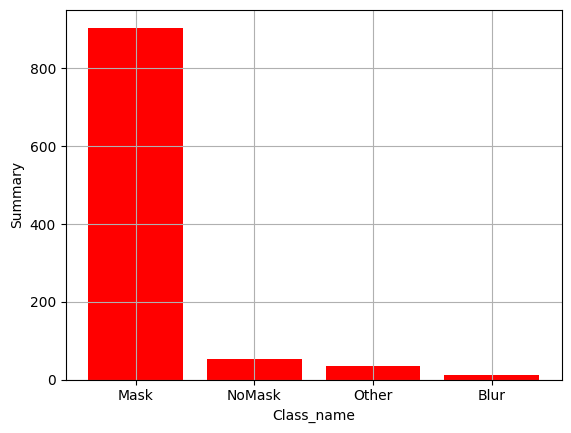

In [68]:
plt.bar(A_df[0],A_df[1], color = "red")
plt.xlabel("Class_name")
plt.ylabel("Summary")
plt.grid()
plt.show()